In [ ]:
# TRR- after transplant
# TCR - at registration


# contain = 'R'
# complete = [col for col in df.columns if contain in col.upper() and col not in completeCols]

# # update
# completeCols.update(complete)

# # display
# complete


# df[complete].describe(include='all').T
# df[complete].isna().sum()
# df[complete].nunique()

# # remove column
# dropCols = ['LT_ONE_WEEK_DON']

# # remove column
# df.drop(columns = dropCols, inplace = True)

# complete = ['LV_EJECT_METH']
# # convert to float & maintain NaN
# df[complete] = df[complete].astype('Int64')
# # convert to object
# df[complete] = df[complete].astype('object')
# # replace NaN values with 'U'
# df[complete] = df[complete].fillna('U')
# # convert str to category data type
# df[complete] = df[complete].astype('category')


# # update set
# completeCols.update(['LV_EJECT_METH_DON','LV_EJECT_DON'])

# # renaming column
# df.rename(columns={'LV_EJECT_METH': 'LV_EJECT_METH_DON', 'LV_EJECT': 'LV_EJECT_DON'}, inplace=True)


# # lets use median for all the nulls
# df['LV_EJECT'] = df['LV_EJECT'].fillna(df['LV_EJECT'].median())

# # count plot
# plotCount(complete, width=20, height=10)

# # ISCHTIME histogram
# plt.hist(df['ISCHTIME'], bins=30)
# plt.xlabel('ISCHTIME')
# plt.ylabel('Frequency')
# plt.title('Histogram of Donor ISCHTIME')
# plt.show()

# # boxplot
# plotBox(complete, width=18, height=12)


# # box plot
# plotBox(complete)

# # list of all donor & heart features
# donorfeature = donor_data.featureName.values
# heartCols = df_heart.columns.values

# # set operation to determine intersection
# intersectionDonor = set(donorfeature) & set(heartCols)

# # initialized variables
# prefix   = 'D_'
# dictColD = dict()
# # iterate 
# for value in intersectionDonor:
#     k = value
#     v = prefix + value
#     # insert
#     dictColD[k] = v

# # rename columns for donor
# df_heart.rename(columns=dictColD, inplace=True)

# # display
# df_heart.head()

# colsUnknow = ['INO_PROCURE_AGENT_1', 'ACTIVATE_DATE', 'LAST_INACT_REASON', 'LASTFUNO']
# y_values = ['GSTATUS', 'GRF_STAT', 'PTIME', 'PSTATUS', 'GTIME', 'ACUTE_REJ_EPI', 'LASTFUNO']


# set(df.columns.values).difference(completeCols)
# # create a boolean mask where WGT_KG_DON_CALC and BMI_DON_CALC are not equal
# mask = df_heart['WGT_KG_DON_CALC'] != df_heart['BMI_DON_CALC']

# # mask to filter the DataFrame
# result = df_heart[mask]

# # display
# result[['WGT_KG_DON_CALC', 'BMI_DON_CALC']].sample(10)

# # set to max
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


# # set to default
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Assuming df is your DataFrame with missing values
# # and features_to_impute is a list of column names with missing values
# features_to_impute = ['feature1', 'feature2', 'feature3']

# # Initialize the imputer
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Fit and transform the data
# df_imputed = df.copy()  # Create a copy to avoid modifying the original DataFrame
# df_imputed[features_to_impute] = imputer.fit_transform(df[features_to_impute])

# set to max
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# set to default
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# df_main.columns[df_main.columns.str.startswith('L')]

### Iterative imputation
IterativeImputer can be more robust to outliers than other specific imputation methods, such as mean or median imputation, because it models each feature with missing values as a function of different features. This modeling approach allows IterativeImputer to capture more complex relationships in the data and mitigate the influence of outliers.

https://github.com/ydataai/ydata-profiling

https://docs.profiling.ydata.ai/latest/

In [1]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

# set seaborn theme
sns.set_theme()

# print version
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.1
Seaborn Version: 0.12.2
Python Version: 3.11.8


In [2]:
# import pickle dataset
df = pd.read_pickle("../Data/cleanDF_5_years.pkl")

# import pickle data description
dataDef = pd.read_pickle("../Data/columnDefinition.pkl")

In [10]:
profileCols = ['NUM_PREV_TX', 'THORACIC_DGN','GENDER', 'ABO', 'CITIZENSHIP', 'EDUCATION']

In [11]:
# !jupyter nbextension enable --py widgetsnbextension

# profile = ProfileReport(df, title="Profiling Report")
# for large dataset
profile = ProfileReport(df[profileCols], title="Sample Profiling Report", explorative=True, minimal=True)

# Generate the profile report
# profile = ProfileReport(df, title="Sample Profiling Report", explorative=True)

# Save the report to an HTML file
# profile.to_file("sample_profiling_report.html")


# profile.to_widgets()
# profile.to_notebook_iframe()

profile.to_file("your_report.html")

# As a JSON string
# json_data = profile.to_json()

# As a file
# profile.to_file("your_report.json")

# ydata_profiling --title "Example Profiling Report" --config_file default.yaml data.csv report.html

/opt/homebrew/Caskroom/miniconda/base/envs/depaul/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Inline report without saving object
report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

In [ ]:
profile_report = df.profile_report(html={"style": {"full_width": True}})
profile_report.to_file("/tmp/example.html")

In [ ]:
profile_report = df.profile_report(
    explorative=True, html={"style": {"full_width": True}}
)
profile_report

In [ ]:
profile_report.to_widgets()

#### Date Columns

In [3]:
# display descriptions
dateCols = df.columns[df.columns.str.contains('DATE')].values

# datecolumn description
dataDef[dataDef.featureName.str.contains('|'.join(dateCols))]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
3,ACTIVATE_DATE,ALLOCATION TIME BEGINNING DATE,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,WL LISTING BACK DATE,Unknown
5,ADMISSION_DATE,RECIPIENT DATE OF ADMISSION TO TX CENTER,TRR,1999-10-25 00:00:00,Unknown,PATIENT STATUS,NUM,TRR DATE OF ADMISSION TO TX CENTER,Unknown
6,ADMIT_DATE_DON,DONOR ADMIT DATE,DDR,2006-04-26 00:00:00,Unknown,DONOR INFORMATION,NUM,DON ADMIT DATE,Unknown
71,DISCHARGE_DATE,RECIPIENT DISCHARGE DATE FROM TX CENTER,TRR,1994-04-01 00:00:00,Unknown,PATIENT STATUS,NUM,TRR DATE OF DISCHARGE FROM TX CENTER,Unknown
92,END_DATE,"EARLIEST OF DATES OF REMOVAL FROM WAITING LIST, TRANSPLANT, DEATH, OR TIME COPY OF DATA CREATED",WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,ENDING DATE FOR REGISTRATION,"IF PATIENT TRANSPLANTED OR DIED, BUT WAS REMOVED AFTER THE EVENT, END_DATE IS BACKDATED TO GIVE THE DATE OF EVENT"
152,INIT_DATE,BEGINNING DATE FOR REGISTRATION,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,BEGINNING DATE FOR REGISTRATION,Unknown
231,PX_STAT_DATE,RECIPIENT STATUS DATE,TRR/TRF-CALCULATED,1987-10-02 00:00:00,Unknown,PATIENT STATUS,NUM,"DATE OF DEATH, RE-TX OR LAST FOLLOW-UP",Unknown
238,RECOVERY_DATE_DON,ORGAN RECOVERY DATE,DDR / LDR,1987-10-01 00:00:00,Unknown,ORGAN RECOVERY,NUM,RECOVERY DATE (SENT TO OR),Unknown
240,REFERRAL_DATE,DATE OF REFERRAL CALL,DDR,1994-04-01 00:00:00,Unknown,PROVIDER INFORMATION,NUM,DDR DATE OF REFERRAL CALL,Unknown
261,TX_DATE,TRANSPLANT DATE,TRR,1987-10-01 00:00:00,Unknown,RECIPIENT INFORMATION,NUM,TRR TRANSPLANT DATE,Unknown


In [4]:
# view date columns
df[dateCols].sample(10)

,ACTIVATE_DATE,END_DATE,INIT_DATE,ADMISSION_DATE,RECOVERY_DATE_DON,PX_STAT_DATE,TX_DATE,DISCHARGE_DATE,ADMIT_DATE_DON,REFERRAL_DATE
16635,05/07/2019,05/10/2019,05/07/2019,05/09/2019,05/10/2019,12/20/2020,05/10/2019,05/24/2019,05/05/2019,05/05/2019
17941,09/26/2019,10/06/2019,09/26/2019,10/05/2019,10/06/2019,06/21/2021,10/06/2019,03/04/2020,10/03/2019,10/03/2019
11871,10/07/2014,09/27/2017,10/07/2014,09/05/2017,09/27/2017,11/03/2021,09/27/2017,10/09/2017,09/25/2017,09/25/2017
10348,06/01/2016,03/14/2017,06/01/2016,03/13/2017,03/14/2017,12/21/2020,03/14/2017,03/24/2017,03/11/2017,03/11/2017
19236,02/01/2019,03/12/2020,02/01/2019,03/09/2020,03/12/2020,03/25/2021,03/12/2020,04/01/2020,03/11/2020,03/11/2020
22316,07/29/2020,04/01/2021,07/29/2020,03/31/2021,04/01/2021,10/14/2021,04/01/2021,04/13/2021,03/27/2021,03/27/2021
17050,07/09/2019,07/30/2019,07/09/2019,07/02/2019,07/30/2019,05/17/2021,07/30/2019,08/08/2019,07/16/2019,07/17/2019
10096,02/07/2017,02/14/2017,02/07/2017,02/14/2017,02/14/2017,12/01/2020,02/14/2017,02/27/2017,02/11/2017,02/12/2017
24665,09/14/2021,11/09/2021,09/14/2021,11/03/2021,11/09/2021,12/02/2021,11/09/2021,12/02/2021,11/02/2021,11/03/2021
19859,06/15/2020,07/03/2020,06/15/2020,06/08/2020,07/03/2020,01/26/2021,07/03/2020,07/13/2020,06/27/2020,06/28/2020


In [5]:
# deep copy date features
df_date = df[dateCols].copy()
# describe
df_date.describe().T

,count,unique,top,freq
ACTIVATE_DATE,15284,2308,05/07/2021,25
END_DATE,15284,1825,02/12/2021,23
INIT_DATE,15284,2251,09/22/2017,27
ADMISSION_DATE,14903,1899,06/28/2018,26
RECOVERY_DATE_DON,15271,1825,02/12/2021,21
PX_STAT_DATE,14858,1322,08/30/2021,81
TX_DATE,15284,1825,02/12/2021,23
DISCHARGE_DATE,14568,1704,03/26/2021,27
ADMIT_DATE_DON,15268,1846,05/04/2019,21
REFERRAL_DATE,15268,1828,10/16/2021,20


## User Function(s)

In [6]:
def yearCountPlot(df, col, txt):
    # deep copy date features
    dates = df[col].copy()

    # remove nulls
    dates = dates.dropna()

    # new column name
    newCol = f"{col}_YEAR"

    # Create DataFrame from Series
    dates = pd.DataFrame(dates)

    # create new column
    dates[col] = pd.to_datetime(dates[col], format='%m/%d/%Y')
    
    # extract the year from the datetime column
    dates[newCol] = dates[col].dt.year

    # plot the count of occurrences per year
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=newCol, data=dates)
    plt.title(f'Count of {txt} Dates per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # annotate the count on top of each bar with integers
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()


def nullDataCounter(df):
    """
    Calculate count of NaNs
    """
    # calculate the percentage of non-null values for each column
    per_calc = pd.DataFrame(df.count() / len(df)) * 100
    
    # rename columns name
    per_calc.rename(columns={0: 'percentage'}, inplace=True)

    # add counter
    per_calc['NaNCount'] = df.isna().sum()
    
    # sort
    per_calc.sort_values(by='NaNCount', inplace=True, ascending=True)

    # 
    NanReturn = per_calc[per_calc.NaNCount != 0]
    
    return NanReturn

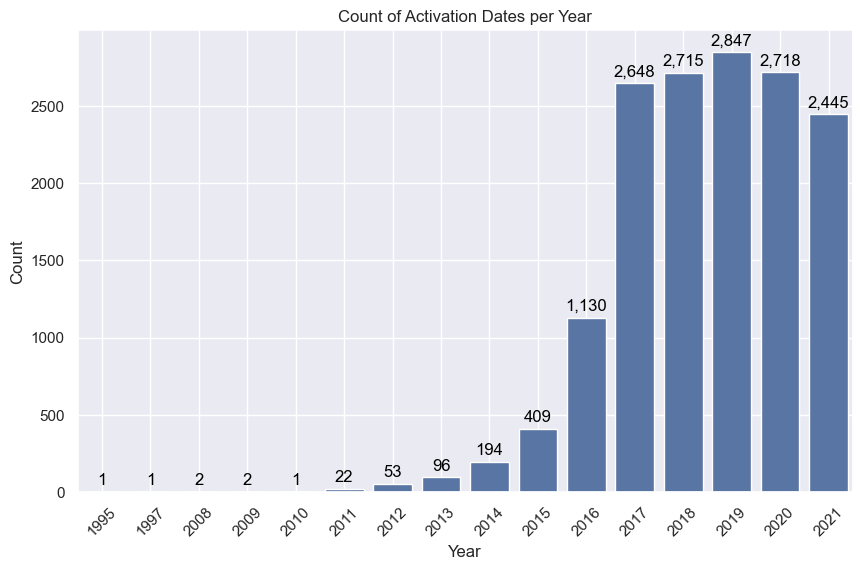

In [7]:
# initialize variables
col = 'ACTIVATE_DATE'
txt = 'Activation'
# count plot
yearCountPlot(df, col, txt)